In [31]:
%matplotlib inline

import random
import matplotlib.pylab as plt
from sklearn.preprocessing import normalize
import numpy as np

In [32]:
# with open('data/winequality-red.csv') as f:
#     f.readline()
#     data = np.loadtxt(f, delimiter=';')

In [33]:
import urllib
# URL for the Wine Quality Data Set (UCI Machine Learning Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
f = urllib.request.urlopen(url)
f.readline()
data = np.loadtxt(f, delimiter=';')

In [34]:
TRAIN_SIZE = 0.7

from sklearn.cross_validation import train_test_split

y = data[:, -1]
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
y -= min(y)

X = data[:, :-1]
X = normalize(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=TRAIN_SIZE, 
                                                   random_state=0)

In [36]:
from pybrain.datasets import ClassificationDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError

In [45]:
HIDDEN_NEURONS_NUM = 100
MAX_EPOCHS = 100

In [46]:
ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_train.setField('input', X_train)
ds_train.setField('target', y_train[:, np.newaxis])
ds_train._convertToOneOfMany()

ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_test.setField('input', X_test)
ds_test.setField('target', y_test[:, np.newaxis])
ds_test._convertToOneOfMany()

In [47]:
np.random.seed(0)

net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)
init_params = np.random.random((len(net.params)))
net._setParameters(init_params)

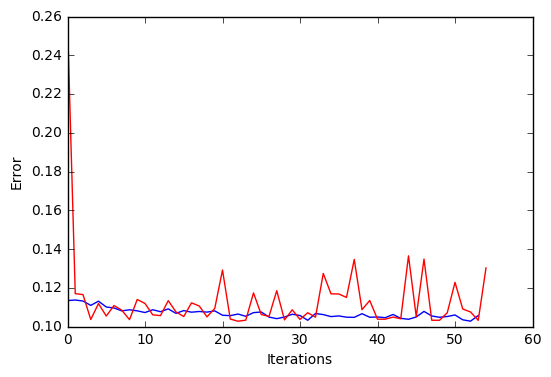

In [48]:
random.seed(0)

trainer = BackpropTrainer(net, dataset=ds_train)
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
line_train = plt.plot(err_train, 'b', err_val, 'r')
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')

In [49]:
res_train = net.activateOnDataset(ds_train).argmax(axis=1) 
print ('Error on train: ',
       percentError(res_train, ds_train['target'].argmax(axis=1)))
res_test = net.activateOnDataset(ds_test).argmax(axis=1)
print ('Error on test: ',
       percentError(res_test, ds_test['target'].argmax(axis=1)))

Error on train:  51.29579982126899
Error on test:  46.666666666666664


   50 neurons: Done in 76 seconds.
  100 neurons: Done in 76 seconds.
  200 neurons: Done in 77 seconds.
  500 neurons: Done in 84 seconds.
  700 neurons: Done in 90 seconds.
 1000 neurons: Done in 91 seconds.


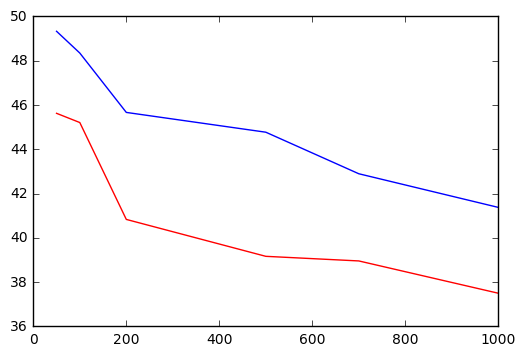

In [51]:
import time

random.seed(0)
np.random.seed(0)

def plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec):
    plt.figure()
    plt.plot(hidden_neurons_num, res_train_vec)
    plt.plot(hidden_neurons_num, res_test_vec, '-r')

hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
res_train_vec = list()
res_test_vec = list()

init_params = np.random.random((len(net.params)))

for nnum in hidden_neurons_num:
    START = time.time()
    net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)
    net._setParameters(init_params)
    
    trainer = BackpropTrainer(net, dataset=ds_train)
    trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
    
    res_train_vec.append(percentError(net.activateOnDataset(ds_train).argmax(axis=1),
                                      ds_train['target'].argmax(axis=1)))
    
    res_test_vec.append(percentError(net.activateOnDataset(ds_test).argmax(axis=1),
                                     ds_test['target'].argmax(axis=1)))
    
    print('{: >5} neurons: Done in {} seconds.'.format(nnum, int(time.time() - START)))
    
plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec)          